In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv('./processed_data/df_train.csv')
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)
print(X_train_norm)
X_train_norm.shape, y_train.shape

[[0.00000000e+00 2.74062706e-05 2.74062706e-05 ... 0.00000000e+00
  1.15500116e-03 1.15526802e-03]
 [8.67435453e-04 0.00000000e+00 0.00000000e+00 ... 8.67435453e-04
  4.15800416e-03 4.15896488e-03]
 [1.53076845e-04 3.28875247e-04 2.74062706e-05 ... 1.53076845e-04
  9.24000924e-04 9.24214418e-04]
 ...
 [4.08204919e-04 0.00000000e+00 0.00000000e+00 ... 4.08204919e-04
  4.62000462e-04 4.62107209e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.02051230e-04 2.74062706e-05 2.74062706e-05 ... 1.02051230e-04
  0.00000000e+00 0.00000000e+00]]


((2940, 140), (2940,))

In [3]:
df_valid = pd.read_csv('./processed_data/df_valid.csv')
X_valid = df_valid.drop('label', axis=1)
y_valid = df_valid['label']

# transform validation data
X_valid_norm = norm.transform(X_valid)

print(X_valid_norm)
X_valid_norm.shape, y_valid.shape

[[4.59230534e-04 2.74062706e-05 0.00000000e+00 ... 4.59230534e-04
  4.62000462e-04 4.62107209e-04]
 [0.00000000e+00 0.00000000e+00 2.74062706e-05 ... 0.00000000e+00
  2.31000231e-04 2.31053604e-04]
 [2.04102459e-04 2.46656435e-04 1.91843894e-04 ... 2.04102459e-04
  4.62000462e-04 4.62107209e-04]
 ...
 [1.53076845e-04 6.02937952e-04 4.93312870e-04 ... 1.53076845e-04
  4.85100485e-03 4.85212569e-03]
 [1.02051230e-04 2.74062706e-05 2.74062706e-05 ... 1.02051230e-04
  9.24000924e-04 9.24214418e-04]
 [1.12256353e-03 3.56281517e-04 1.64437623e-04 ... 1.12256353e-03
  2.31000231e-03 2.31053604e-03]]


((979, 140), (979,))

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=50, n_jobs=-1)
svm_clf = SVC(C=10000)
log_clf = LogisticRegression(C=10000, max_iter=10000)

voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf), ('svm', svm_clf), ('log', log_clf)],
    voting='hard')

In [5]:
# validating
from sklearn.metrics import accuracy_score

for clf in (rnd_clf, svm_clf, log_clf, voting_clf):
    clf.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_valid_norm)
    print(clf.__class__.__name__, accuracy_score(y_valid, y_pred))

RandomForestClassifier 0.95097037793667
SVC 0.9264555669050051
LogisticRegression 0.9152196118488254
VotingClassifier 0.9560776302349336


In [6]:
df_test = pd.read_csv('./processed_data/df_test.csv')
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

# transform testing data
X_test_norm = norm.transform(X_test)

print(X_test_norm)
X_test_norm.shape, y_test.shape

[[7.09256047e-03 8.77000658e-04 1.91843894e-04 ... 7.09256047e-03
  2.54100254e-03 2.54158965e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.06153689e-03 5.75531682e-04 1.91843894e-04 ... 3.06153689e-03
  1.89420189e-02 1.89463956e-02]
 ...
 [1.02051230e-04 5.20719141e-04 1.09625082e-04 ... 1.02051230e-04
  4.38900439e-03 4.39001848e-03]
 [2.04102459e-04 2.74062706e-05 2.74062706e-05 ... 2.04102459e-04
  6.93000693e-04 6.93160813e-04]
 [5.10256149e-05 0.00000000e+00 0.00000000e+00 ... 5.10256149e-05
  0.00000000e+00 0.00000000e+00]]


((980, 140), (980,))

In [7]:
# testing
for clf in (rnd_clf, svm_clf, log_clf, voting_clf):
    clf.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_test_norm)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9540816326530612
SVC 0.9275510204081633
LogisticRegression 0.9275510204081633
VotingClassifier 0.9612244897959183


In [8]:
# visualisation of results
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = voting_clf.predict(X_test_norm)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[150   6   2   0   0   0   0]
 [ 14 115   0   1   0   0   1]
 [  0   0 142   0   0   0   0]
 [  2   1   0 136   0   0   0]
 [  0   0   0   0 122   0   0]
 [  0   0   7   1   0 139   0]
 [  1   0   2   0   0   0 138]]


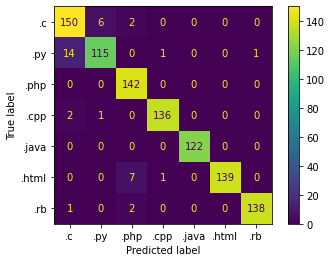

In [9]:
display = ConfusionMatrixDisplay(confusion_matrix, display_labels=[i for i in set(y_pred)])
display.plot()